In [ ]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
train_values = pd.read_csv('/content/train_values.csv')
train_labels = pd.read_csv('/content/train_labels.csv')
test_values = pd.read_csv('/content/test_values.csv')
#

In [ ]:
print("# Train Values: {}".format(train_values.shape))
print("# Train Labels: {}".format(train_labels.shape))
print("# Test Values: {}".format(test_values.shape))

# Train Values: (260601, 39)
# Train Labels: (260601, 2)
# Test Values: (86868, 39)


In [ ]:
#Data source
name = "age"
data = train_values[name]

winsorized_data = winsorize(data,(0, 0.05))

train_values[name] = winsorized_data

In [ ]:
#Data source
name = "area_percentage"
data = train_values[name]

winsorized_data = winsorize(data,(0, 0.055))

#Replace data in dataset
train_values[name] = winsorized_data

In [ ]:
#Data source
name = "height_percentage"
data = train_values[name]

#Winsorization
winsorized_data = winsorize(data,(0, 0.04))


# Replace data in dataset
train_values[name] = winsorized_data

# Correlations


In [ ]:
buildingId_train = train_values["building_id"].copy()
train_values.drop(columns=["building_id"], inplace=True)
train_labels.drop(columns=["building_id"], inplace=True)
test_values.drop(columns=["building_id"], inplace=True)
# test_labels.drop(columns=["building_id"], inplace=True)

In [ ]:
train_values_new = pd.get_dummies(train_values, drop_first = True)
test_values_new = pd.get_dummies(test_values, drop_first = True)

In [ ]:
# !pip install scikit-learn

from sklearn.metrics import f1_score as score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#cross_val_predict: #The data is split according to the cv parameter. Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set
from sklearn.model_selection import cross_val_predict

#Compute confusion matrix to evaluate the accuracy of a classification.
#model precision score measures the proportion of positively predicted labels that are actually correct, Precision Score = TP / (FP + TP) ( positive predictive value)
#recall_score :the model’s ability to correctly predict the positives out of actual positives. Recall Score = TP / (FN + TP)
#accuracy score :In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
#f1_score : F1 score reaches its best value at 1 and worst score at 0. F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import confusion_matrix , precision_score, recall_score  ,accuracy_score ,f1_score, classification_report
from sklearn.metrics import precision_recall_curve


# DecisionTreeClassifier() :  breaking down a dataset into smaller and smaller subsets based on different criteria.
from sklearn.tree import DecisionTreeClassifier

#Logistic Regression  : outputs predictions about test data points on a binary scale, zero or one. If the value of something is 0.5 or above, it is classified as belonging to class 1, while below 0.5 if is classified as belonging to 0.
#The SGDClassifier applies regularized linear model with SGD learning to build an estimator.
from sklearn.linear_model import SGDClassifier, LogisticRegression

#A random forest : is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
from sklearn.ensemble import RandomForestClassifier

##The neighbors number is important in this method. Selecting the right number of neighbors provides the more accurate results.
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
#precision recall tradeoff , function to plot presicion and recall and thresholds
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(visible=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)


from sklearn.preprocessing import label_binarize

In [ ]:
data=train_values_new
data_labels=train_labels
data_test=test_values_new

***Best models***

---



In [ ]:
#Decision Tree
dt = DecisionTreeClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = dt.fit(train_values_new, train_labels)
dt_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(test_values_new)
dt_time_pred = time.time() - start_time

print("Decision Tree")
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Training Score: {}".format(dt.score(train_values_new, train_labels)))
print("Training F1 Score: {}".format(f1_score(train_labels, model.predict(train_values_new), average='weighted')))

print("----------------------------------------")

Decision Tree
Fit Time: 6.462234735488892 seconds
Prediction Time: 0.05354642868041992 seconds
Training Score: 0.7494176921807668
Training F1 Score: 0.7441140796202377
----------------------------------------


In [ ]:
y_train_pred = cross_val_predict(dt, data, data_labels, cv=3)
#CONFUSION MATRIX : to describe the performance of a classification model
dt_clf_cm=confusion_matrix(data_labels,y_train_pred)

#Precision Score = TP / (FP + TP) ( positive predictive value)
dt_clf_precision = precision_score(data_labels, y_train_pred, average='weighted')

# Recall Score = TP / (FN + TP)
dt_clf_recall = recall_score(data_labels, y_train_pred, average='weighted')

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
dt_clf_f1 = f1_score(data_labels, y_train_pred, average='weighted')

#accuracy score :
dt_clf_accuracy=accuracy_score(data_labels,y_train_pred)

sc = cross_val_score(dt, data, data_labels, cv=3,scoring="accuracy")

dt_clf_accuracy

0.7122497611290823

confusion matrix:
 [[ 11281  13359    484]
 [  6483 122131  19645]
 [   643  34374  52201]]
dt_clf_precision    :  0.7096693090960878
dt_clf_recall       :  0.7122497611290823
dt_clf_f1           :  0.7057930040671256
dt_clf_accuracy     :  0.7122497611290823
y_scores         :
 [3 2 3 ... 3 2 3]
sc               : [0.71276779 0.71181231 0.71216918]


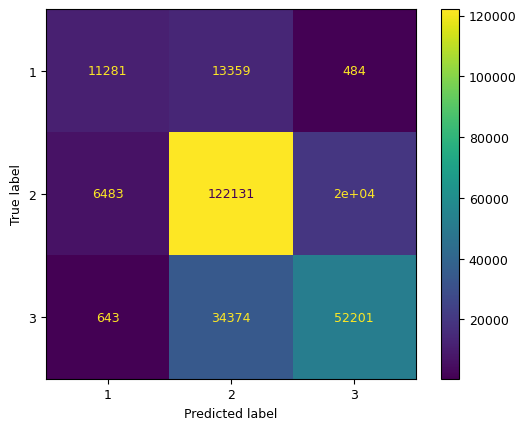

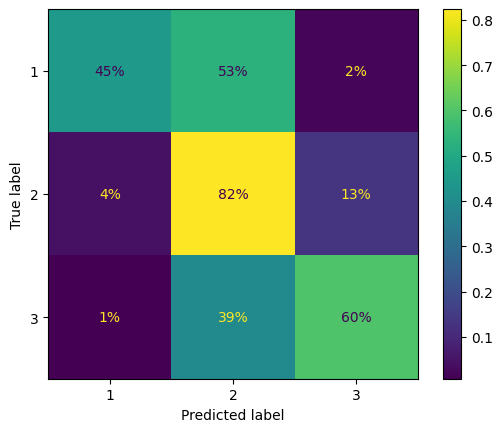

In [ ]:
print("confusion matrix:\n",dt_clf_cm)
print("dt_clf_precision    : ",dt_clf_precision)
print("dt_clf_recall       : ",dt_clf_recall)
print("dt_clf_f1           : " ,dt_clf_f1)
print("dt_clf_accuracy     : ",dt_clf_accuracy)
print("y_scores         :\n" ,y_train_pred)
print("sc               :" ,sc)


plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred)
plt.show()

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'DecisionTreeClassifier.pkl')

In [ ]:
#Random Forest
rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = rf.fit(train_values_new, train_labels)
rf_time_fit = time.time() - start_time

#Predictions - Random Forest
start_time = time.time()
model.predict(test_values_new)
rf_time_pred = time.time() - start_time
print("Random Forest")
print("Fit Time: {} seconds".format(rf_time_fit))
print("Prediction Time: {} seconds".format(rf_time_pred))
print("Training Score: {}".format(rf.score(train_values_new, train_labels)))
print("Training F1 Score: {}".format(f1_score(train_labels, model.predict(train_values_new), average='weighted')))

print("----------------------------------------")

Random Forest
Fit Time: 221.36538767814636 seconds
Prediction Time: 2.314121961593628 seconds
Training Score: 0.7558336307228292
Training F1 Score: 0.7486031984248882
----------------------------------------


In [ ]:
y_train_pred = cross_val_predict(rf, data, data_labels, cv=3)
#CONFUSION MATRIX : to describe the performance of a classification model
RF_clf_cm=confusion_matrix(data_labels,y_train_pred)

#Precision Score = TP / (FP + TP) ( positive predictive value)
RF_clf_precision = precision_score(data_labels, y_train_pred, average='weighted')

# Recall Score = TP / (FN + TP)
RF_clf_recall = recall_score(data_labels, y_train_pred, average='weighted')

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
RF_clf_f1 = f1_score(data_labels, y_train_pred, average='weighted')

#accuracy score :
RF_clf_accuracy=accuracy_score(data_labels,y_train_pred)


# the function cross_val_predict() return decision scores instead of prediction :
RF_clf_y_scores = cross_val_predict(rf, data, data_labels, cv=3)

sc = cross_val_score(rf, data, data_labels, cv=3,scoring="accuracy")

RF_clf_accuracy

0.7287961289480854

confusion matrix:
 [[ 10520  14305    299]
 [  4597 126650  17012]
 [   368  34095  52755]]
RF_clf_precision    :  0.7291001738787238
RF_clf_recall       :  0.7287961289480854
RF_clf_f1           :  0.720182119375201
RF_clf_accuracy     :  0.7287961289480854
y_scores         :
 [3 2 3 ... 3 2 3]
sc               : [0.72754901 0.72978231 0.72905706]


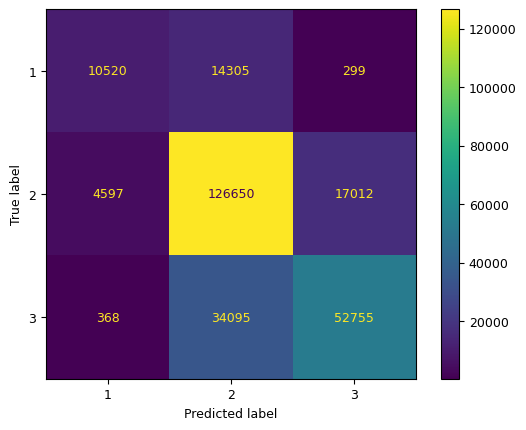

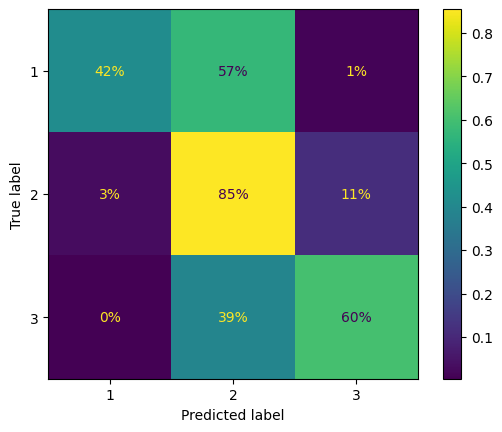

In [ ]:
print("confusion matrix:\n",RF_clf_cm)
print("RF_clf_precision    : ",RF_clf_precision)
print("RF_clf_recall       : ",RF_clf_recall)
print("RF_clf_f1           : " ,RF_clf_f1)
print("RF_clf_accuracy     : ",RF_clf_accuracy)
print("y_scores         :\n" ,RF_clf_y_scores)
print("sc               :" ,sc)


plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred)
plt.show()

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [ ]:
!pip install joblib

In [ ]:
joblib.dump(model, 'random_forest_model.pkl')

In [ ]:

# Load the saved Random Forest model
model = joblib.load('random_forest_model.pkl')

# Use the model to make predictions on test data
predictions = model.predict(test_values_new)



In [ ]:
submission_format = pd.read_csv('/content/submission_format.csv', index_col='building_id')

In [ ]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [ ]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [ ]:
my_submission.to_csv('submission.csv')

In [ ]:
!head submission.csv

building_id,damage_grade
300051,3
99355,2
890251,2
745817,1
421793,3
871976,2
691228,1
896100,3
343471,2


In [ ]:
# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [None, 45, 50, 55],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [20, 30, 40]
}
from sklearn.metrics import make_scorer, f1_score
# Use F1 score as the scoring metric
scorer = make_scorer(f1_score, average='weighted')

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(train_values_new, train_labels)

# Get the best parameters and print them
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a Random Forest model with the best parameters
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(train_values_new, train_labels)

# Calculate and print the F1 score on the test set
train_f1_score = f1_score(train_labels, best_rf.predict(train_values_new), average='weighted')
print("train F1 Score with Best Parameters:", train_f1_score)